In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv(merged_df)

Mounted at /content/drive


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Drop rows with missing values
data = data.dropna()
data.describe()


,unitid,FIPS,latitude,longitude,week,admission_rate,number_students,TotalCount,TotalCountWeekly,TotalConfirmedPositive,TotalConfirmedPositiveWeekly,TotalPositivityRate,TotalPositivityRateWeekly,tweet_count,covid_tweet_count,sentiment_score,likes,tweet_replies,rt,quotes
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,185310.039234,30354.962591,39.312605,-83.999075,3160.628650,0.478194,14315.085766,35468.164234,4434.216241,473.929745,43.731752,3.284388,2.918480,15.341241,2.116788,0.334181,827.379562,30.330292,149.062956,37.406022
std,47340.884629,14243.275847,4.085549,11.864633,2.818701,0.259359,11266.821733,68600.514353,7833.205209,774.883779,81.236804,5.351538,4.917059,12.026621,2.721981,0.166553,1588.954309,237.758137,372.425966,249.460976
min,106397.000000,5143.000000,25.721260,-122.260463,3156.000000,0.043600,907.000000,16.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.941300,3.000000,0.000000,0.000000,0.000000
25%,155025.000000,18141.000000,37.229012,-88.766428,3158.000000,0.227100,5131.000000,5249.250000,502.750000,40.000000,4.000000,0.267596,0.159813,7.000000,0.000000,0.236176,119.000000,2.000000,21.000000,4.000000
50%,182670.000000,29510.000000,40.203431,-81.026935,3161.000000,0.517300,10764.000000,15142.000000,1841.000000,154.000000,14.000000,1.258885,1.129498,12.000000,1.000000,0.337774,318.000000,6.000000,56.000000,10.000000
75%,215062.000000,42027.000000,42.087868,-75.305207,3163.000000,0.680150,21136.250000,38031.000000,4809.750000,565.750000,47.000000,4.111065,3.487156,20.000000,3.000000,0.430778,880.000000,17.250000,144.250000,27.000000
max,495767.000000,55079.000000,47.921654,-70.203333,3165.000000,1.000000,53194.000000,815205.000000,64239.000000,5028.000000,864.000000,49.919485,46.428571,98.000000,18.000000,0.922250,18763.000000,7292.000000,7696.000000,7671.000000


In [ ]:
selected_features = ['admission_rate', 'number_students','tweet_count',
                     'covid_tweet_count', 'sentiment_score', 'likes', 'tweet_replies',
                     'rt', 'quotes']

# Split data into features (X) and target variable (y)
X = data[selected_features]
y = data['TotalPositivityRate']
print(X.head())
print(y.head())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



   admission_rate  number_students  tweet_count  covid_tweet_count  \
0          0.7747            23121         13.0                1.0   
1          0.7747            23121         12.0                1.0   
2          0.7747            23121         12.0                3.0   
3          0.7747            23121         13.0                1.0   
4          0.7747            23121         16.0                0.0   

   sentiment_score  likes  tweet_replies    rt  quotes  
0         0.366254  188.0            7.0  41.0     5.0  
1         0.553883  504.0            6.0  83.0    13.0  
2         0.208883  167.0            2.0  40.0     2.0  
3         0.269031  131.0            4.0  34.0     8.0  
4         0.308181  668.0            9.0  83.0    12.0  
0    13.060599
1    11.377038
2    10.136452
3     8.940482
4     7.991482
Name: TotalPositivityRate, dtype: float64
X_train shape: (876, 9)
X_test shape: (220, 9)
y_train shape: (876,)
y_test shape: (220,)


Linear Regression:
Mean Squared Error: 27.14260546153913
R-squared: 0.10679693222857223


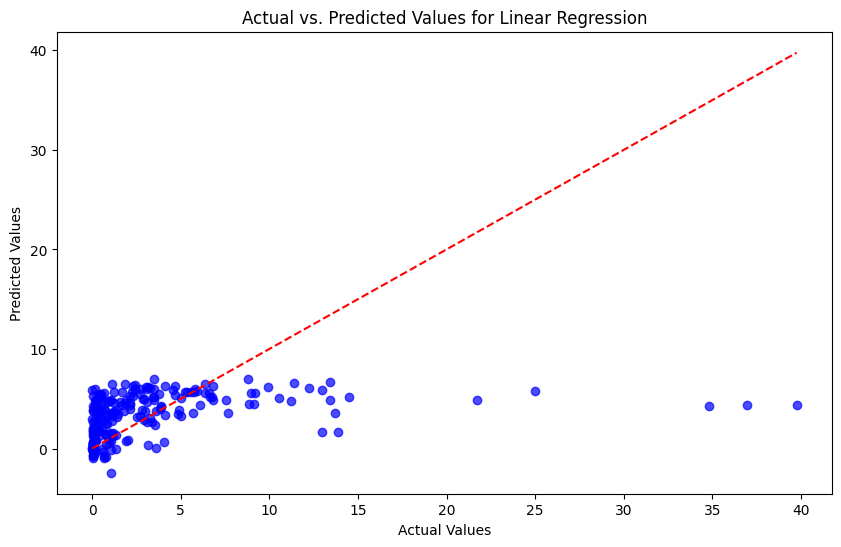

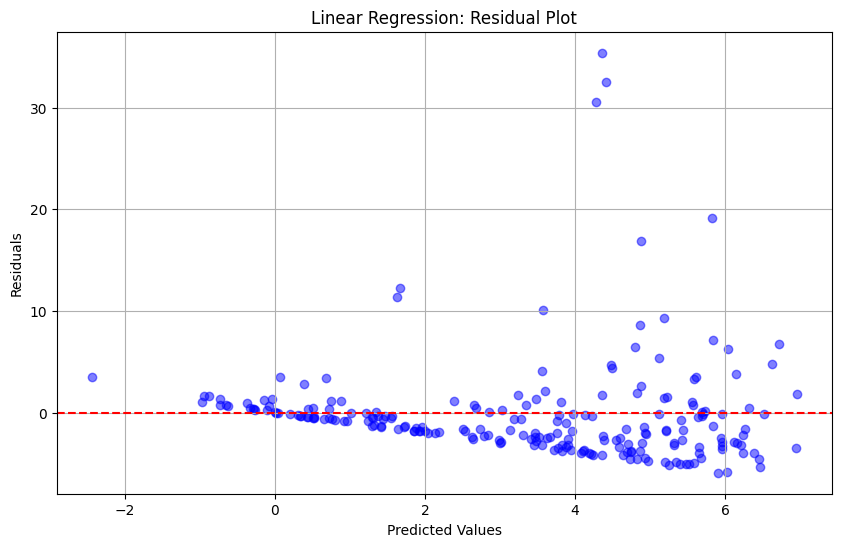

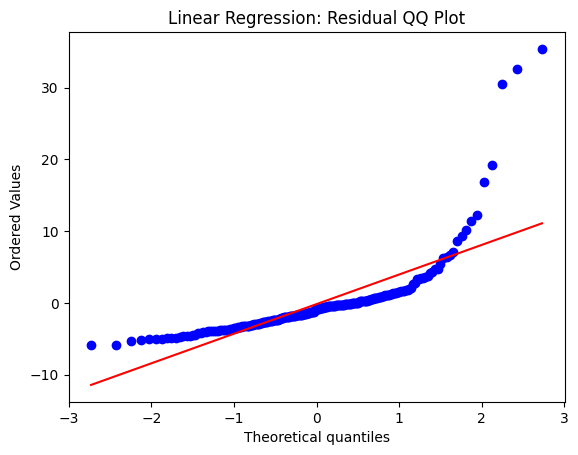

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
modelfull = LinearRegression()

# Train the model
modelfull.fit(X_train, y_train)

# Make predictions on the test data
y_predfull = modelfull.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predfull)
r2 = r2_score(y_test, y_predfull)
print("Linear Regression:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predfull, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()

plt.figure(figsize=(10, 6))

# Residual plot
residuals = y_test - y_predfull
plt.scatter(y_predfull, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate residuals
residuals_linear = y_test - y_predfull

# Create a QQ plot
stats.probplot(residuals_linear, plot=plt)
plt.title('Linear Regression: Residual QQ Plot')
plt.show()




The relatively high MSE suggests that the model's predictions are not consistently close to the actual values. This could be due to the inherent complexity of the problem.
The low R-squared value indicates that the features used in the model are not strongly correlated with the target variable. It implies that the linear relationship captured by the model is limited in explaining the variations in TotalPositivityRate.


Top 10 Important Features:
             Feature  Importance
0     admission_rate    6.239806
4    sentiment_score    2.873527
2        tweet_count   -0.031960
3  covid_tweet_count    0.006894
8             quotes    0.001986
6      tweet_replies   -0.001856
7                 rt    0.000164
1    number_students    0.000065
5              likes    0.000014


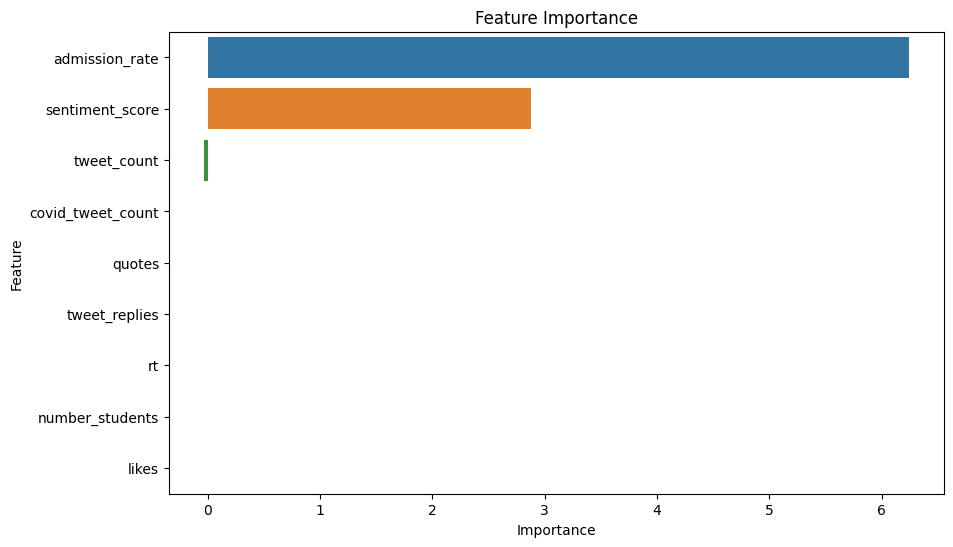

In [ ]:
# Extract feature importance from the model
feature_importance = modelfull.coef_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_names = X.columns

# Sort features by their absolute coefficients in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Importance'].abs().sort_values(ascending=False).index)

# Top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

The higher admission rates and sentiment_score are associated with higher positivity rates. The higher tweet counts might be asscoiated with lower positivity rates.

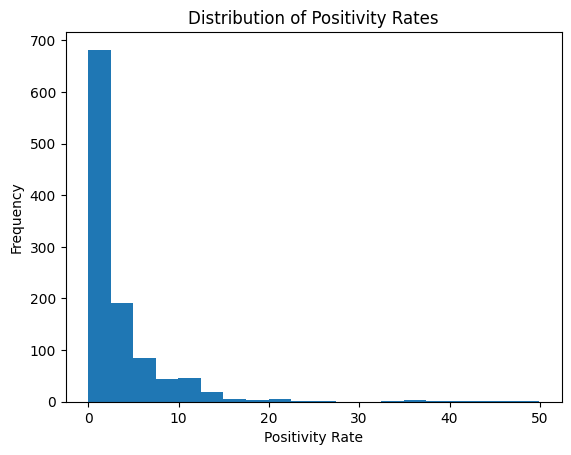

In [ ]:
# Plot the distribution of positivity rates
plt.hist(data['TotalPositivityRate'], bins=20)
plt.xlabel('Positivity Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Positivity Rates')
plt.show()

Since the distribution is skewed, we could use the percentiles to calculate the threshold.

In [ ]:
# Calculate the 75th percentile of positivity rates
percentile_75 = np.percentile(data['TotalPositivityRate'], 75)

# Set the threshold as the 75th percentile
threshold = percentile_75

print("Threshold:", threshold)

Threshold: 4.111065232934822


In [ ]:
from scipy.stats import ttest_ind

# Define the two groups based on positivity rates
high_positivity = data[data['TotalPositivityRate'] > threshold]
low_positivity = data[data['TotalPositivityRate'] <= threshold]

# Choose the features you want to compare
features_to_compare = ['admission_rate', 'sentiment_score', 'tweet_count', 'covid_tweet_count']

for feature_to_compare in features_to_compare:
    # Extract the values of the chosen feature for each group
    feature_values_high = high_positivity[feature_to_compare]
    feature_values_low = low_positivity[feature_to_compare]

    # Perform t-test to compare means of the two groups
    t_statistic, p_value = ttest_ind(feature_values_high, feature_values_low)

    # Print the results for each feature
    print(f"Feature: {feature_to_compare}")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)

    alpha = 0.05

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        print("Null hypothesis rejected: There is a significant difference between the groups.")
    else:
        print("Null hypothesis not rejected: There is no significant difference between the groups.")
    print()


Feature: admission_rate
T-Statistic: 13.993566266689001
P-Value: 4.704946182919981e-41
Null hypothesis rejected: There is a significant difference between the groups.

Feature: sentiment_score
T-Statistic: 4.5053185756978404
P-Value: 7.3392414822363056e-06
Null hypothesis rejected: There is a significant difference between the groups.

Feature: tweet_count
T-Statistic: -2.830868963762733
P-Value: 0.004727176775355294
Null hypothesis rejected: There is a significant difference between the groups.

Feature: covid_tweet_count
T-Statistic: -2.6727435604607037
P-Value: 0.0076352770925088775
Null hypothesis rejected: There is a significant difference between the groups.



The admission_rate, sentiment_score, tweet_count, covid_tweet_count features could potentially play a role in explaining the variation in positivity rates among different groups of universities.




In [ ]:
from zmq.constants import XREP
significant_features = ['admission_rate', 'sentiment_score', 'tweet_count']

# Split the data into training and testing sets
Xr = data[significant_features]
y = data['TotalPositivityRate']
X_trainr, X_test, y_trainr, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
modelr = LinearRegression()

# Train the model on the training data
modelr.fit(X_trainr, y_trainr)

# Make predictions on the test data
y_predr = modelr.predict(X_test)

# Evaluate the model's performance
mse_r = mean_squared_error(y_test, y_predr)
r2_r = r2_score(y_test, y_predr)

print("Linear Regression Reduced:")
print("Mean Squared Error:", mse_r)
print("R-squared:", r2_r)


Linear Regression Reduced:
Mean Squared Error: 27.070585530592854
R-squared: 0.10916694874570632


The reduction in Mean Squared Error (MSE) and the increase in R-squared indicate that the model with the reduced set of features is better at capturing the variations in the target variable. Therefore, this suggests that the model with significant features leads to a more accurate model for predicting the positivity rate.


We shall perform feature selection using recursive feature elimination (RFE) with Linear Regression Model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_trainref, X_test, y_trainref, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
modelref = LinearRegression()

# Initialize RFE with the Linear Regression model
rfe = RFE(modelref, n_features_to_select=7)  # Select top 7 features

# Fit RFE to the training data
rfe.fit(X_trainref, y_trainref)

selected_featuresref = X.columns[rfe.support_]
print("Selected Features:", selected_featuresref)

# Train the model on the selected features
modelref.fit(X_trainref[selected_featuresref], y_trainref)

# Make predictions on the testing data using selected features
y_predref = modelref.predict(X_test[selected_featuresref])

# Evaluate the model
mse_ref = mean_squared_error(y_test, y_predref)
r2_ref = r2_score(y_test, y_predref)
print("Linear Regression with REF")
print("Mean Squared Error:", mse_ref)
print("R-squared:", r2_ref)


Selected Features: Index(['admission_rate', 'tweet_count', 'covid_tweet_count', 'sentiment_score',
       'tweet_replies', 'rt', 'quotes'],
      dtype='object')
Linear Regression with REF
Mean Squared Error: 27.09056148468396
R-squared: 0.10850958431173108


To capture non-linear relationship, we use polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering: Create a pipeline for feature engineering
feature_engineering_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),  # Create polynomial features
    ('scaler', StandardScaler())  # Standardize features
])

# Apply the feature engineering pipeline
X_train_engineered = feature_engineering_pipeline.fit_transform(X_train)
X_test_engineered = feature_engineering_pipeline.transform(X_test)

# Initialize the Linear Regression model
modelp = LinearRegression()

# Fit the model to the engineered training data
modelp.fit(X_train_engineered, y_train)

# Predict on the engineered testing data
y_predp = modelp.predict(X_test_engineered)

# Evaluate the model
mse_p = mean_squared_error(y_test, y_predp)
r2_p = r2_score(y_test, y_predp)
print("Linear Regression with polynomial features:")
print("Mean Squared Error:", mse_p)
print("R-squared:", r2_p)

Linear Regression with polynomial features:
Mean Squared Error: 28.184255558654776
R-squared: 0.07251853314096512


To reduce noise and computaional complexity, we shall use the PCA by transforming the features into a lower-dimensional space while retaining as much variance as possible.

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define additional feature engineering techniques
feature_engineering_pipelinepca = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('power_transform', PowerTransformer(method='yeo-johnson')),  # Apply power transformation
    ('pca', PCA(n_components=2))  # Reduce dimensionality using PCA
])

# Apply the feature engineering pipeline
X_train_engineeredpca = feature_engineering_pipelinepca.fit_transform(X_train)
X_test_engineeredpca = feature_engineering_pipelinepca.transform(X_test)

# Initialize the Linear Regression model
modelpca = LinearRegression()

# Fit the model to the engineered training data
modelpca.fit(X_train_engineeredpca, y_train)

# Predict on the engineered testing data
y_predpca = modelpca.predict(X_test_engineeredpca)

# Evaluate the model
mse_pca = mean_squared_error(y_test, y_predpca)
r2_pca = r2_score(y_test, y_predpca)
print("Linear Regression with PCA:")
print("Mean Squared Error:", mse_pca)
print("R-squared:", r2_pca)

Linear Regression with PCA:
Mean Squared Error: 26.75729845902673
R-squared: 0.1194765328352847


The additional feature engineering techniques, including standard scaling, power transformation, and dimensionality reduction using PCA, have contributed to a modest improvement in the model's predictive performance.
The lower MSE and higher R-squared value suggest that the engineered features capture some additional information and relationships within the data.
While the improvement is not substantial, it's a positive sign that the applied techniques are aligning better with the underlying patterns in the data.

Overall, the linear regression did not perform well on this data since the distribution of positivity rates is not normal.

Consider using the other model such as Gradient Boosting Regression to improve predictive performance.

In [ ]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regression:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R-squared: {r2_gb:.2f}")


Gradient Boosting Regression:
Mean Squared Error: 3.48
R-squared: 0.89


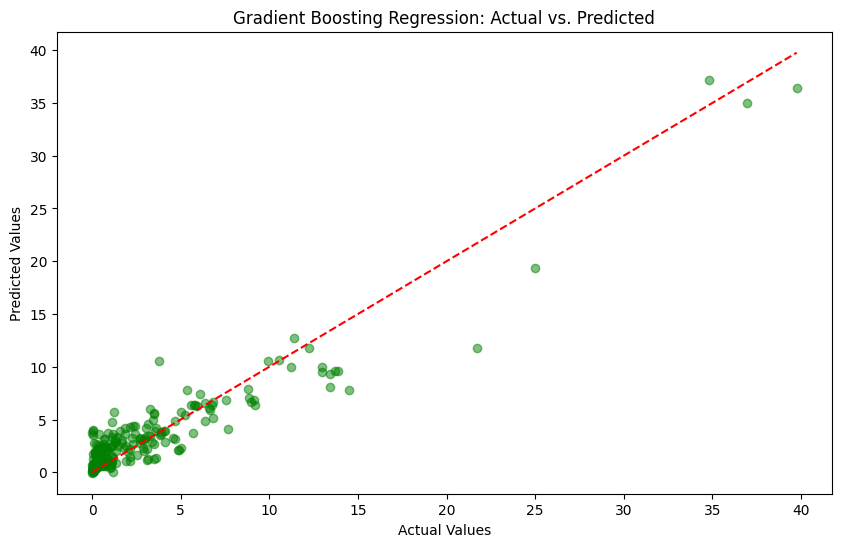

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for the Gradient Boosting Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression: Actual vs. Predicted')
plt.show()


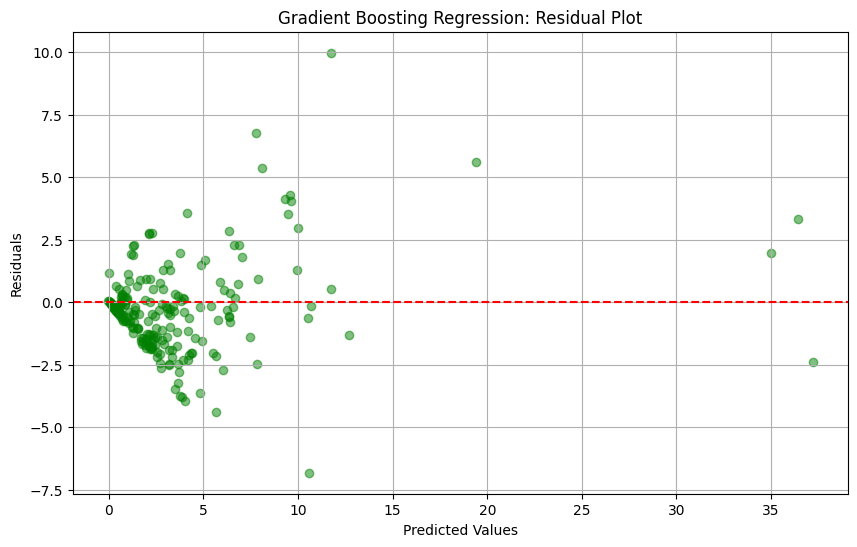

In [ ]:
plt.figure(figsize=(10, 6))

# Residual plot
residuals_gb = y_test - y_pred_gb
plt.scatter(y_pred_gb, residuals_gb, color='green', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Regression: Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


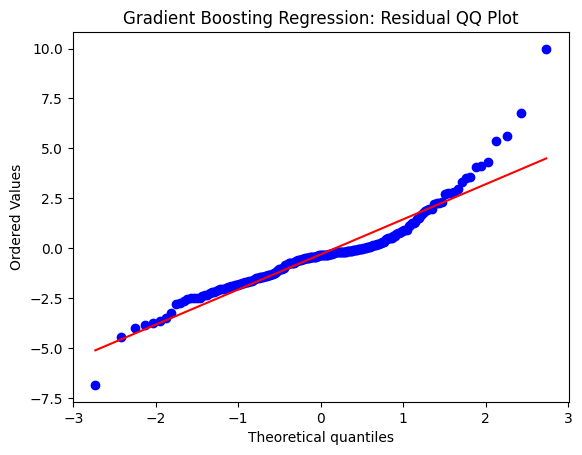

In [ ]:
# Calculate the residuals
residuals_gb = y_test - y_pred_gb

# Create a QQ plot
stats.probplot(residuals_gb, plot=plt)
plt.title('Gradient Boosting Regression: Residual QQ Plot')
plt.show()


The Gradient Boosting Regression model has performed remarkably well, significantly reducing the prediction error and explaining a substantial amount of variance in the target.
An R-squared value of 0.89 suggests that the model has captured strong relationships between the features and the target, resulting in accurate predictions.
The strong performance of this model indicates that it has effectively learned complex patterns in the data.


Feature Importance:
             Feature  Importance
0     admission_rate    0.537011
1    number_students    0.285681
2        tweet_count    0.046310
5              likes    0.041278
4    sentiment_score    0.036792
7                 rt    0.018448
6      tweet_replies    0.013373
8             quotes    0.011611
3  covid_tweet_count    0.009498


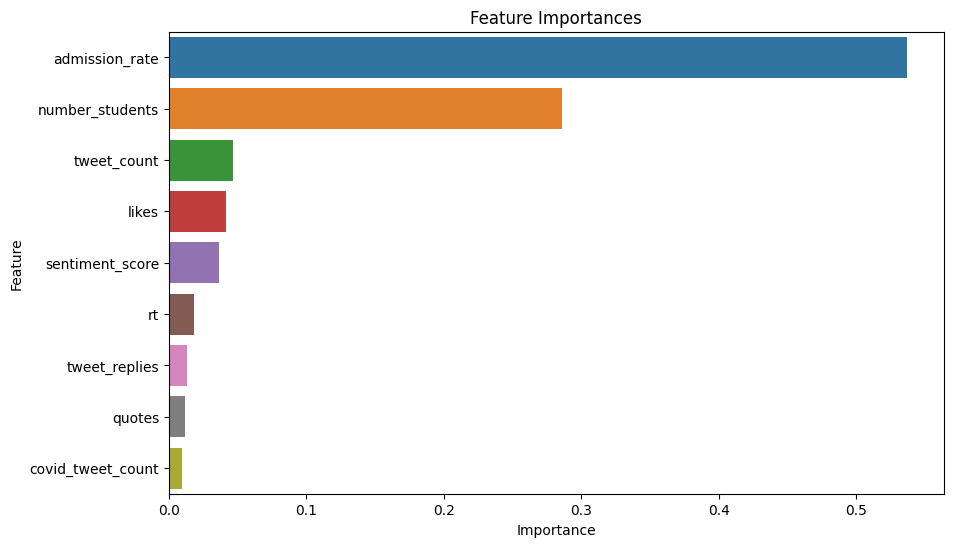

Random Forest Regression:
Mean Squared Error: 3.38
R-squared: 0.89
Random Forest Regression with Polynomial Features:
Mean Squared Error: 4.93
R-squared: 0.84


In [ ]:
# Performing feature engineering, selection using Random Forest Regression and Random Forest Regression with Polynomial Features.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Recursive Feature Elimination (RFE)
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Create a RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = model_rf.feature_importances_
feature_importances

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Predict on the testing data
y_pred_rf = model_rf.predict(X_test_scaled)

# Calculate evaluation metrics for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Create a RandomForestRegressor model with polynomial features
model_rf_poly = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data with polynomial features
model_rf_poly.fit(X_train_poly, y_train)

# Predict on the testing data with polynomial features
y_pred_rf_poly = model_rf_poly.predict(X_test_poly)

# Calculate evaluation metrics for Random Forest model with polynomial features
mse_rf_poly = mean_squared_error(y_test, y_pred_rf_poly)
r2_rf_poly = r2_score(y_test, y_pred_rf_poly)

print("Random Forest Regression with Polynomial Features:")
print(f"Mean Squared Error: {mse_rf_poly:.2f}")
print(f"R-squared: {r2_rf_poly:.2f}")

As observed, the Random Forest Regression model without polynomial features has a lower MSE and a higher R-squared value compared to the model with polynomial features. This suggests that the polynomial features might not have significantly improved the model's performance, and in fact, may have introduced some noise or overfitting.


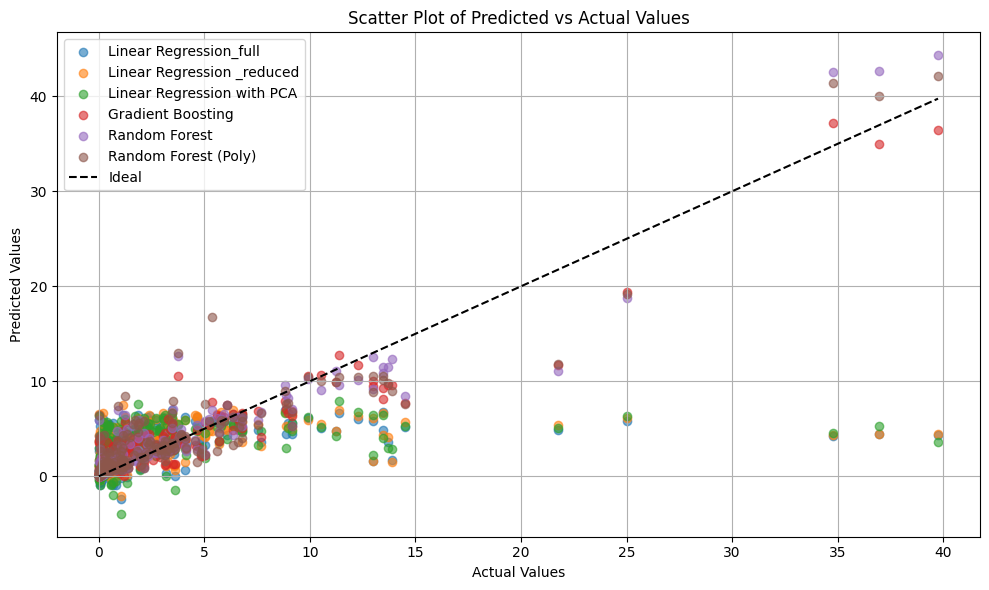

In [ ]:
import matplotlib.pyplot as plt

# Calculate predicted values for all models
y_pred_models = [y_predfull, y_predr, y_predpca, y_pred_gb, y_pred_rf, y_pred_rf_poly]

# List of model names
model_names = ['Linear Regression_full', 'Linear Regression _reduced', 'Linear Regression with PCA', 'Gradient Boosting', 'Random Forest', 'Random Forest (Poly)']

# Create a scatter plot
plt.figure(figsize=(10, 6))

for i, y_pred_model in enumerate(y_pred_models):
    plt.scatter(y_test, y_pred_model, label=model_names[i], alpha=0.6)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the scatter plot
plt.show()


The Gradient Boosting Regression has the best overall performance. They have lower Mean Squared Error values and higher R-squared values, suggesting accurate predictions and better capture of underlying patterns in the data. The Linear Regression model has the weakest performance among the models evaluated.